# COMPARISON OF DENOISING PARAMETERS (*SPARSE2D*)
---

The denoising method was implemented from <a href="https://github.com/CEA-COSMIC/pysap.git" target="_blank">pySAP</a> in `pysap.extensions.sparse2d`. We tested the following combinations of parameters.

**1st combination :** `tab_n_sigma = [5]`, `type_of_filtering = 3`

**2nd combination :** `tab_n_sigma = [5]`, `type_of_multiresolution_transform = 2`

**3rd combination :** `tab_n_sigma = [5]`, `type_of_multiresolution_transform = 24`, `type_of_filtering = 6`
     

## CONTENTS
---

1. [DATA PREPARATION](#DATA)
1. [METRICS OF COMPARISON](#METRICS)
1. [RESULTS](#RESULTS)
    1. [Visualisation](#VISUALISATION)
1. [RESULTS TO DATAFRAME](#RESULTS-TO-DATAFRAME)

In [306]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# DATA
---

In [ ]:
#Importation
input_path = '/Users/alacan/Documents/Cosmostat/Codes/BlendHunter'

blended = np.load('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh_5/blended_noisy.npy', allow_pickle=True)
not_blended =np.load('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh_5/not_blended_noisy.npy', allow_pickle=True)

In [196]:
#Import denoised images
def load_images(path= None, method=None, noise=None):
    img = np.load(path+'/denoised/bh_{}_denoised{}/test_images.npy'.format(noise, method), allow_pickle=True)
    return img

#Import original images
def get_images(sample):
        return np.array([sample[obj]['galsim_image'][0].array for obj in range(36000,40000)])

#Import noisy images
def get_noisy(path=None, noise=None):
    return np.load(path+'/bh_{}/test_images.npy'.format(noise), allow_pickle=True)

In [57]:
#Original images
original_blended = get_images(blended)
original_not_blended = get_images(not_blended)
original = np.concatenate((original_blended, original_not_blended))

In [197]:
#Noisy_images
noisy5 = get_noisy(noise=5, path=input_path)
noisy14 = get_noisy(noise=14, path=input_path)
noisy18 = get_noisy(noise=18, path=input_path)
noisy40 = get_noisy(noise=40, path=input_path)

In [170]:
#Denoised images
dn_images5_1 = load_images(path = input_path, method = 1, noise=5)
dn_images5_2 = load_images(path = input_path, method = 2, noise=5)
dn_images5_3 = load_images(path = input_path, method = 3, noise=5)

dn_images14_1 = load_images(path = input_path, method = 1, noise=14)
dn_images14_2 = load_images(path = input_path, method = 2, noise=14)
dn_images14_3 = load_images(path = input_path, method = 3, noise=14)

dn_images40_1 = load_images(path = input_path, method = 1, noise=40)
dn_images40_2 = load_images(path = input_path, method = 2, noise=40)
dn_images40_3 = load_images(path = input_path, method = 3, noise=40)

dn_images18_1 = load_images(path = input_path, method = 1, noise=18)
dn_images18_2 = load_images(path = input_path, method = 2, noise=18)
dn_images18_3 = load_images(path = input_path, method = 3, noise=18)

dn_images26_1 = load_images(path = input_path, method = 1, noise=26)

dn_images35_1 = load_images(path = input_path, method = 1, noise=35)

In [317]:
#Denoised images for different noise realisations
dn_images51_1= load_images(path = input_path, method = 1, noise = 51)
dn_images52_1= load_images(path = input_path, method = 1, noise = 52)
dn_images53_1= load_images(path = input_path, method = 1, noise = 53)
dn_images54_1= load_images(path = input_path, method = 1, noise = 54)

dn_images141_1= load_images(path = input_path, method = 1, noise = 141)
dn_images142_1= load_images(path = input_path, method = 1, noise = 142)
dn_images143_1= load_images(path = input_path, method = 1, noise = 143)
dn_images144_1= load_images(path = input_path, method = 1, noise = 144)

dn_images181_1= load_images(path = input_path, method = 1, noise = 181)
dn_images182_1= load_images(path = input_path, method = 1, noise = 182)
dn_images183_1= load_images(path = input_path, method = 1, noise = 183)
dn_images184_1= load_images(path = input_path, method = 1, noise = 184)

In [52]:
#Import segmentation maps
seg_map_b = np.load('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/bh_5/test_seg_map.npy', allow_pickle=True)
seg_map_nb = np.array([not_blended[val]['seg_map'][0].array for val in range(36000, 40000)])
seg_map = np.concatenate((seg_map_b, seg_map_nb))

# METRICS
---

In [292]:
#Calculation residual noise
def res_noise(images = None, mask=None):
    return np.array([np.mean(abs(images[i][mask[i] == 0])) for i in range(len(images))])

#Calculation of lost information in galaxies
def lost_info(images=None, mask=None):
    return np.array([np.mean(abs(images[i][mask[i] != 0] - original[i][mask[i] != 0])) for i in range(len(images))])

#Calculation of SNR
def snr_alpha(images=None, sigma=None, mask=None):    
    alpha = np.array([np.sum(images[i][mask[i] == 1] ** 2) for i in range(len(images))])   
    return np.array([np.sqrt(alpha[i] / sigma**2) for i in range(len(alpha))])

def snr_beta(images=None, sigma=None, mask=None):   
    beta = np.array([np.sum(images[i][mask[i] == 2] ** 2) for i in range(0, 4000)])
    return np.array([np.sqrt(beta[i] / sigma**2) for i in range(len(beta))])

# Calculation of PSNR
import math
import cv2

def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 10*math.log10((PIXEL_MAX **2) / mse)

def mean_psnr_noisy(images, round_to = None):
    return round(float(np.mean((*[psnr(images[0][i], original_blended[i]) for i in range(len(images[0]))], *[psnr(images[1][i], original_not_blended[i]) for i in range(len(images[1]))]))), round_to)

def mean_psnr(denoised_images=None, round_to = None):
    return round(float(np.mean([psnr(denoised_images[i], original[i]) for i in range(len(original))])), round_to)

#Original SNR
snr = np.mean(snr_alpha(images=original, sigma=5.0, mask= seg_map)) + np.mean(snr_beta(images=original, sigma=5.0, mask= seg_map))

# RESULTS
---

In [288]:
#PSNR on noisy images
psnr5 = mean_psnr_noisy(noisy5, round_to = 3)
psnr14 = mean_psnr_noisy(noisy14, round_to = 3)
psnr18 = mean_psnr_noisy(noisy18, round_to = 3)
psnr40 = mean_psnr_noisy(noisy40, round_to = 3)

In [163]:
#Calculation of residual noise
mean5_1 =  round(float(np.mean(res_noise(images=dn_images5_1, mask=seg_map))), 3)
mean5_2 =  round(float(np.mean(res_noise(images=dn_images5_2, mask=seg_map))), 3)
mean5_3 =  round(float(np.mean(res_noise(images=dn_images5_3, mask=seg_map))), 3)
print('---RESIDUAL NOISE AND QUALITY OF DENOISING---')
print('Mean residual noise with 1st method for sigma_noise = 5 : {}'.format(mean5_1))
print('Mean residual noise with 2nd method for sigma_noise = 5 : {}'.format(mean5_2))
print('Mean residual noise with 3rd method for sigma_noise = 5 : {}'.format(mean5_3))

snr5_1 =  float(np.mean(snr_alpha(images=dn_images5_1, sigma=5.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images5_1, sigma=5.0, mask= seg_map)))
snr5_2 =  float(np.mean(snr_alpha(images=dn_images5_2, sigma=5.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images5_2, sigma=5.0, mask= seg_map)))
snr5_3 =  float(np.mean(snr_alpha(images=dn_images5_3, sigma=5.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images5_3, sigma=5.0, mask= seg_map)))
print('---SNR---')
print('SNR ratio with 1st method for sigma_noise = 5 : {}'.format(round(snr5_1/snr, 5)))
print('SNR ratio with 2nd method for sigma_noise = 5 : {}'.format(round(snr5_2/snr, 5)))
print('SNR ratio with 3rd method for sigma_noise = 5 : {}'.format(round(snr5_3/snr, 5)))

psnr5_1 =  round(float(np.mean([psnr(dn_images5_1[i], original[i]) for i in range(len(original))])), 3)
psnr5_2 =  round(float(np.mean([psnr(dn_images5_2[i], original[i]) for i in range(len(original))])), 3)
psnr5_3 =  round(float(np.mean([psnr(dn_images5_3[i], original[i]) for i in range(len(original))])), 3)
print('---PSNR AND QUALITY OF RECONSTRUCTION---')
print('PSNR with 1st method for sigma_noise = 5 : {}'.format(psnr5_1))
print('PSNR with 2nd method for sigma_noise = 5 : {}'.format(psnr5_2))
print('PSNR with 3rd method for sigma_noise = 5 : {}'.format(psnr5_3))


---RESIDUAL NOISE AND QUALITY OF DENOISING---
Mean residual noise with 1st method for sigma_noise = 5 : 0.403
Mean residual noise with 2nd method for sigma_noise = 5 : 0.539
Mean residual noise with 3rd method for sigma_noise = 5 : 0.623
---SNR---
SNR ratio with 1st method for sigma_noise = 5 : 0.99997
SNR ratio with 2nd method for sigma_noise = 5 : 0.99696
SNR ratio with 3rd method for sigma_noise = 5 : 0.99947
---PSNR AND QUALITY OF RECONSTRUCTION---
PSNR with 1st method for sigma_noise = 5 : 49.197
PSNR with 2nd method for sigma_noise = 5 : 48.553
PSNR with 3rd method for sigma_noise = 5 : 47.518


In [164]:
#Calculation of residual noise
mean14_1 = round(float(np.mean(res_noise(images=dn_images14_1, mask=seg_map))), 3)
mean14_2 = round(float(np.mean(res_noise(images=dn_images14_2, mask=seg_map))), 3)
mean14_3 = round(float(np.mean(res_noise(images=dn_images14_3, mask=seg_map))), 3)
print('---RESIDUAL NOISE AND QUALITY OF DENOISING---')
print('Mean residual noise with 1st method for sigma_noise = 14 : {}'.format(mean14_1))
print('Mean residual noise with 2nd method for sigma_noise = 14 : {}'.format(mean14_2))
print('Mean residual noise with 3rd method for sigma_noise = 14 : {}'.format(mean14_3))
#Calculation of lost info
snr14_1 = float(np.mean(snr_alpha(images=dn_images14_1, sigma=14.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images14_1, sigma=14.0, mask= seg_map)))
snr14_2 = float(np.mean(snr_alpha(images=dn_images14_2, sigma=14.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images14_2, sigma=14.0, mask= seg_map)))
snr14_3 = float(np.mean(snr_alpha(images=dn_images14_3, sigma=14.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images14_3, sigma=14.0, mask= seg_map)))
print('---SNR---')
print('SNR ratio with 1st method for sigma_noise = 14 : {}'.format(round(snr14_1/snr, 3)))
print('SNR ratio with 2nd method for sigma_noise = 14 : {}'.format(round(snr14_2/snr, 3)))
print('SNR ratio with 3rd method for sigma_noise = 14 : {}'.format(round(snr14_3/snr, 3)))
psnr14_1 = round(float(np.mean([psnr(dn_images14_1[i], original[i]) for i in range(len(original))])), 3)
psnr14_2 = round(float(np.mean([psnr(dn_images14_2[i], original[i]) for i in range(len(original))])), 3)
psnr14_3 = round(float(np.mean([psnr(dn_images14_3[i], original[i]) for i in range(len(original))])), 3)
print('---PSNR AND QUALITY OF RECONSTRUCTION---')
print('PSNR with 1st method for sigma_noise = 14 : {}'.format(psnr14_1))
print('PSNR with 2nd method for sigma_noise = 14 : {}'.format(psnr14_2))
print('PSNR with 3rd method for sigma_noise = 14 : {}'.format(psnr14_3))

---RESIDUAL NOISE AND QUALITY OF DENOISING---
Mean residual noise with 1st method for sigma_noise = 14 : 0.625
Mean residual noise with 2nd method for sigma_noise = 14 : 0.958
Mean residual noise with 3rd method for sigma_noise = 14 : 1.201
---SNR---
SNR ratio with 1st method for sigma_noise = 14 : 0.357
SNR ratio with 2nd method for sigma_noise = 14 : 0.351
SNR ratio with 3rd method for sigma_noise = 14 : 0.356
---PSNR AND QUALITY OF RECONSTRUCTION---
PSNR with 1st method for sigma_noise = 14 : 43.317
PSNR with 2nd method for sigma_noise = 14 : 41.073
PSNR with 3rd method for sigma_noise = 14 : 40.324


In [165]:
#Calculation of residual noise
mean18_1 = round(float(np.mean(res_noise(images=dn_images18_1, mask=seg_map))), 3)
mean18_2 = round(float(np.mean(res_noise(images=dn_images18_2, mask=seg_map))), 3)
mean18_3 = round(float(np.mean(res_noise(images=dn_images18_3, mask=seg_map))), 3)
print('---RESIDUAL NOISE AND QUALITY OF DENOISING---')
print('Mean residual noise with 1st method for sigma_noise = 18 : {}'.format(mean18_1))
print('Mean residual noise with 2nd method for sigma_noise = 18 : {}'.format(mean18_2))
print('Mean residual noise with 3rd method for sigma_noise = 18 : {}'.format(mean18_3))
#Calculation of lost info
snr18_1 = float(np.mean(snr_alpha(images=dn_images18_1, sigma=18.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images18_1, sigma=18.0, mask= seg_map)))
snr18_2 = float(np.mean(snr_alpha(images=dn_images18_2, sigma=18.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images18_2, sigma=18.0, mask= seg_map)))
snr18_3 = float(np.mean(snr_alpha(images=dn_images18_3, sigma=18.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images18_3, sigma=18.0, mask= seg_map)))
print('---SNR---')
print('SNR ratio with 1st method for sigma_noise = 18 : {}'.format(round(snr18_1/snr, 3)))
print('SNR ratio with 2nd method for sigma_noise = 18 : {}'.format(round(snr18_2/snr, 3)))
print('SNR ratio with 3rd method for sigma_noise = 18 : {}'.format(round(snr18_3/snr, 3)))
psnr18_1 = round(float(np.mean([psnr(dn_images18_1[i], original[i]) for i in range(len(original))])), 3)
psnr18_2 = round(float(np.mean([psnr(dn_images18_2[i], original[i]) for i in range(len(original))])), 3)
psnr18_3 = round(float(np.mean([psnr(dn_images18_3[i], original[i]) for i in range(len(original))])), 3)
print('---PSNR AND QUALITY OF RECONSTRUCTION---')
print('PSNR with 1st method for sigma_noise = 18 : {}'.format(psnr18_1))
print('PSNR with 2nd method for sigma_noise = 18 : {}'.format(psnr18_2))
print('PSNR with 3rd method for sigma_noise = 18 : {}'.format(psnr18_3))

---RESIDUAL NOISE AND QUALITY OF DENOISING---
Mean residual noise with 1st method for sigma_noise = 18 : 0.732
Mean residual noise with 2nd method for sigma_noise = 18 : 1.141
Mean residual noise with 3rd method for sigma_noise = 18 : 1.456
---SNR---
SNR ratio with 1st method for sigma_noise = 18 : 0.278
SNR ratio with 2nd method for sigma_noise = 18 : 0.271
SNR ratio with 3rd method for sigma_noise = 18 : 0.277
---PSNR AND QUALITY OF RECONSTRUCTION---
PSNR with 1st method for sigma_noise = 18 : 41.646
PSNR with 2nd method for sigma_noise = 18 : 39.123
PSNR with 3rd method for sigma_noise = 18 : 38.49


In [168]:
#Calculation of residual noise
mean26_1 = round(float(np.mean(res_noise(images=dn_images26_1, mask=seg_map))), 3)
print('---RESIDUAL NOISE AND QUALITY OF DENOISING---')
print('Mean residual noise with 1st method for sigma_noise = 26 : {}'.format(mean26_1))
#Calculation of lost info
snr26_1 = float(np.mean(snr_alpha(images=dn_images26_1, sigma=26.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images26_1, sigma=26.0, mask= seg_map)))
print('---SNR---')
print('SNR ratio with 1st method for sigma_noise = 26 : {}'.format(round(snr26_1/snr, 3)))
psnr26_1 = round(float(np.mean([psnr(dn_images26_1[i], original[i]) for i in range(len(original))])), 3)
print('---PSNR AND QUALITY OF RECONSTRUCTION---')
print('PSNR with 1st method for sigma_noise = 26 : {}'.format(psnr26_1))

---RESIDUAL NOISE AND QUALITY OF DENOISING---
Mean residual noise with 1st method for sigma_noise = 26 : 0.937
---SNR---
SNR ratio with 1st method for sigma_noise = 26 : 0.192
---PSNR AND QUALITY OF RECONSTRUCTION---
PSNR with 1st method for sigma_noise = 26 : 39.032


In [172]:
#Calculation of residual noise
mean35_1 = round(float(np.mean(res_noise(images=dn_images35_1, mask=seg_map))), 3)
print('---RESIDUAL NOISE AND QUALITY OF DENOISING---')
print('Mean residual noise with 1st method for sigma_noise = 35 : {}'.format(mean35_1))
#Calculation of lost info
snr35_1 = float(np.mean(snr_alpha(images=dn_images35_1, sigma=35.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images35_1, sigma=35.0, mask= seg_map)))
print('---SNR---')
print('SNR ratio with 1st method for sigma_noise = 35 : {}'.format(round(snr35_1/snr, 3)))
psnr35_1 = round(float(np.mean([psnr(dn_images35_1[i], original[i]) for i in range(len(original))])), 3)
print('---PSNR AND QUALITY OF RECONSTRUCTION---')
print('PSNR with 1st method for sigma_noise = 35 : {}'.format(psnr35_1))

---RESIDUAL NOISE AND QUALITY OF DENOISING---
Mean residual noise with 1st method for sigma_noise = 35 : 1.179
---SNR---
SNR ratio with 1st method for sigma_noise = 35 : 0.142
---PSNR AND QUALITY OF RECONSTRUCTION---
PSNR with 1st method for sigma_noise = 35 : 36.71


In [166]:
#Calculation of residual noise
mean40_1 = round(float(np.mean(res_noise(images=dn_images40_1, mask=seg_map))), 3)
mean40_2 = round(float(np.mean(res_noise(images=dn_images40_2, mask=seg_map))), 3)
mean40_3 = round(float(np.mean(res_noise(images=dn_images40_3, mask=seg_map))), 3)
print('---RESIDUAL NOISE AND QUALITY OF DENOISING---')
print('Mean residual noise with 1st method for sigma_noise = 40 : {}'.format(mean40_1))
print('Mean residual noise with 2nd method for sigma_noise = 40 : {}'.format(mean40_2))
print('Mean residual noise with 3rd method for sigma_noise = 40 : {}'.format(mean40_3))
#Calculation of lost info
snr40_1 = float((np.mean(snr_alpha(images=dn_images40_1, sigma=40.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images40_1, sigma=40.0, mask= seg_map))))
snr40_2 = float(np.mean(snr_alpha(images=dn_images40_2, sigma=40.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images40_2, sigma=40.0, mask= seg_map)))
snr40_3 = float(np.mean(snr_alpha(images=dn_images40_3, sigma=40.0, mask= seg_map)) + np.mean(snr_beta(images=dn_images40_3, sigma=40.0, mask= seg_map)))
print('---SNR---')
print('SNR ratio with 1st method for sigma_noise = 40 : {}'.format(round(snr40_1/snr, 3)))
print('SNR ratio with 2nd method for sigma_noise = 40 : {}'.format(round(snr40_2/snr, 3)))
print('SNR ratio with 3rd method for sigma_noise = 40 : {}'.format(round(snr40_3/snr, 3)))
psnr40_1 = round(float(np.mean([psnr(dn_images40_1[i], original[i]) for i in range(len(original))])), 3)
psnr40_2 = round(float(np.mean([psnr(dn_images40_2[i], original[i]) for i in range(len(original))])), 3)
psnr40_3 = round(float(np.mean([psnr(dn_images40_3[i], original[i]) for i in range(len(original))])), 3)
print('---PSNR AND QUALITY OF RECONSTRUCTION---')
print('PSNR with 1st method for sigma_noise = 40 : {}'.format(psnr40_1))
print('PSNR with 2nd method for sigma_noise = 40 : {}'.format(psnr40_2))
print('PSNR with 3rd method for sigma_noise = 40 : {}'.format(psnr40_3))

---RESIDUAL NOISE AND QUALITY OF DENOISING---
Mean residual noise with 1st method for sigma_noise = 40 : 1.325
Mean residual noise with 2nd method for sigma_noise = 40 : 2.135
Mean residual noise with 3rd method for sigma_noise = 40 : 2.828
---SNR---
SNR ratio with 1st method for sigma_noise = 40 : 0.123
SNR ratio with 2nd method for sigma_noise = 40 : 0.118
SNR ratio with 3rd method for sigma_noise = 40 : 0.124
---PSNR AND QUALITY OF RECONSTRUCTION---
PSNR with 1st method for sigma_noise = 40 : 35.624
PSNR with 2nd method for sigma_noise = 40 : 33.181
PSNR with 3rd method for sigma_noise = 40 : 32.489


## MORE NOISE REALISATIONS

In [318]:
#PSNR on noisy images
list_psnr_5 = [mean_psnr(denoised_images=img, round_to=3) for img in [dn_images5_1, dn_images51_1, dn_images52_1, dn_images53_1, dn_images54_1]]
list_psnr_14 = [mean_psnr(denoised_images=img, round_to=3) for img in [dn_images14_1, dn_images141_1, dn_images142_1, dn_images143_1, dn_images144_1]]
list_psnr_18 = [mean_psnr(denoised_images=img, round_to=3) for img in [dn_images18_1, dn_images181_1, dn_images182_1, dn_images183_1, dn_images184_1]]

In [319]:
#Mean PSNR
mean_psnr5 = np.mean(list_psnr_5)
mean_psnr14 = np.mean(list_psnr_14)
mean_psnr18 = np.mean(list_psnr_18)
#Std deviation of PSNR

std_psnr5 = np.std(list_psnr_5)
std_psnr14 = np.std(list_psnr_14)
std_psnr18 = np.std(list_psnr_18)

## VISUALISATION


In [390]:
#List of sigma_noise values
sig = [5.0, 14.0, 18.0, 40.0]
#List of values for each metric per combination
list_means1 = [mean5_1, mean14_1,mean18_1, mean40_1]
list_means2 = [mean5_2, mean14_2,mean18_2, mean40_2]
list_means3 = [mean5_3, mean14_3,mean18_3, mean40_3]

list_snr1 = [round(snr5_1, 3), round(snr14_1,3),round(snr18_1 ,3), round(snr40_1 ,3)]
list_snr2 = [round(snr5_2,3), round(snr14_2,3),round(snr18_2,3), round(snr40_2,3)]
list_snr3 = [round(snr5_3,3), round(snr14_3,3),round(snr18_3,3), round(snr40_3,3)]

list_psnr1 = [psnr5_1, psnr14_1,psnr18_1, psnr40_1]
list_psnr2 = [psnr5_2, psnr14_2,psnr18_2, psnr40_2]
list_psnr3 = [psnr5_3, psnr14_3,psnr18_3, psnr40_3]

#list PSNR on noisy images
list_psnr = [psnr5, psnr14, psnr18, psnr40]

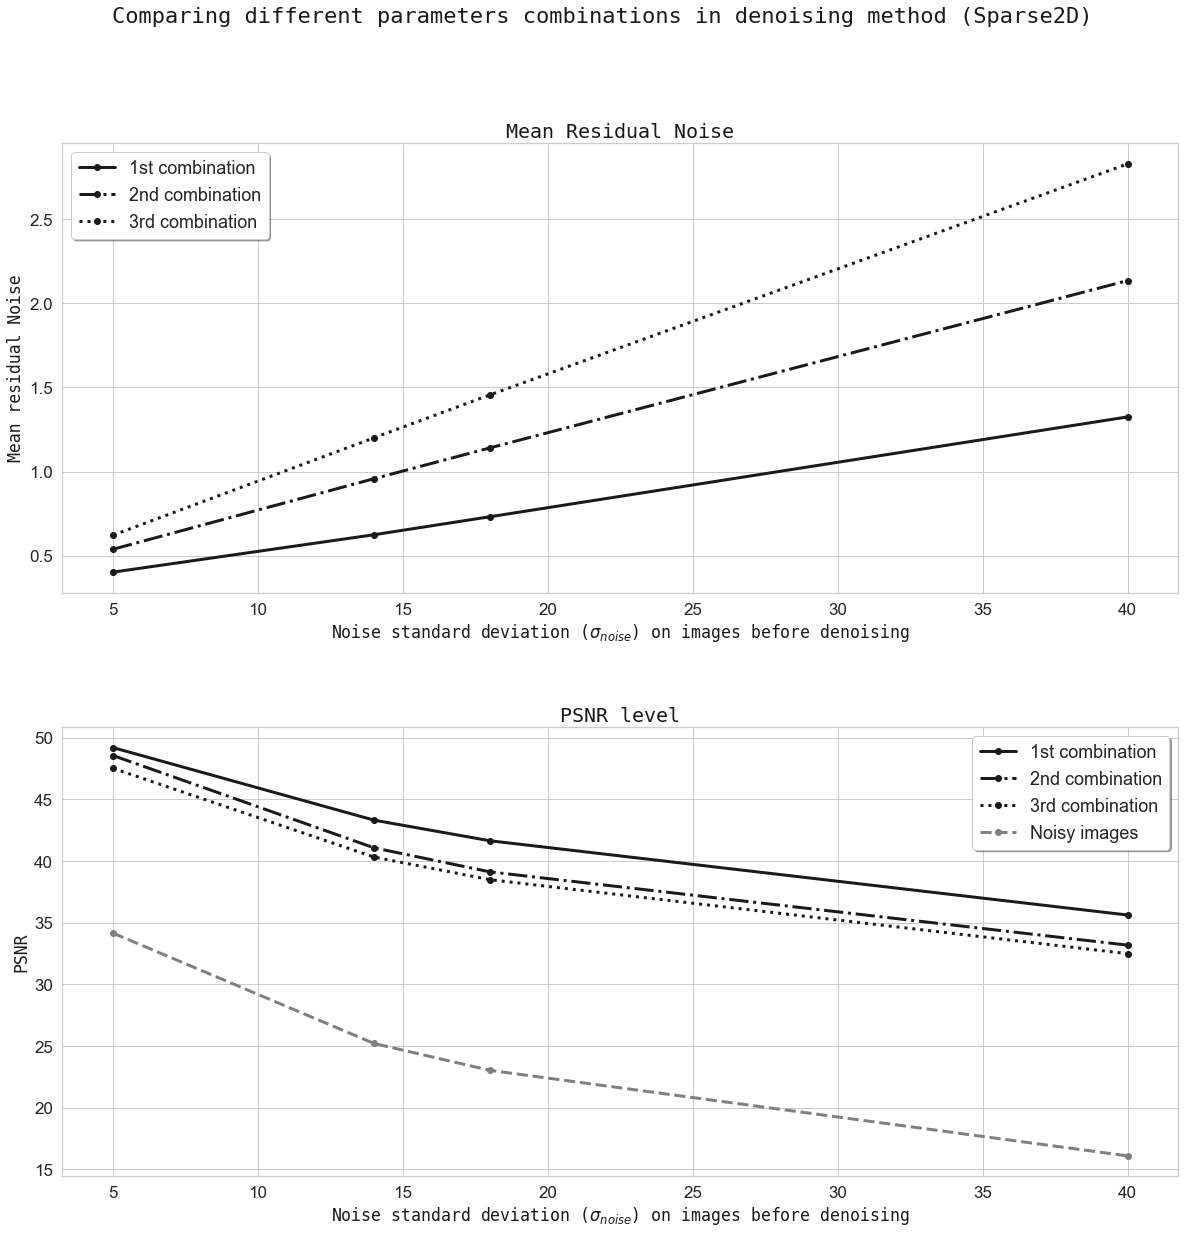

In [281]:
sns.set(context='notebook', style='whitegrid', palette='deep')

font = {'family': 'monospace',
        'color':  'k',
        'weight': 'normal',
        'size': 16.5}

fig, ax = plt.subplots(2,figsize=(20,19), sharey='row')
fig.suptitle('Comparing different parameters combinations in denoising method (Sparse2D)', fontdict={'family': 'monospace','color':  'k','weight': 'bold'}, fontsize=22)

#First subplot (Accuracy w.r.t. sigma_noise)
ax[0].set_title('Mean Residual Noise', fontdict=font, fontsize=20)
ax[0].plot(sig, list_means1, 'k',marker='o', linewidth=3, label='1st combination')
ax[0].plot(sig, list_means2, 'k', ls='dashdot', marker ='o', linewidth=3, label='2nd combination')
ax[0].plot(sig, list_means3, 'k:', marker ='o', linewidth=3, label='3rd combination')
ax[0].legend(loc='upper left', shadow=True, fontsize=18)
ax[0].set_ylabel('Mean residual Noise', fontdict = font)
ax[0].set_xlabel('Noise standard deviation ($\sigma_{noise}$) on images before denoising', fontdict = font)
ax[0].tick_params(axis='both', which='major', labelsize=17)

#Second subplot (Missed blends by SExtractor and BH's false negatives in a future commit)
ax[1].set_title('PSNR level', fontdict=font, fontsize=20)
ax[1].plot(sig, list_psnr1, 'k',marker='o', linewidth=3, label='1st combination')
ax[1].plot(sig, list_psnr2, 'k', ls='dashdot', marker ='o', linewidth=3, label='2nd combination')
ax[1].plot(sig, list_psnr3, 'k:', marker ='o', linewidth=3, label='3rd combination')
ax[1].plot(sig, list_psnr, 'grey', ls = '--',marker ='o', linewidth=3, label='Noisy images')
ax[1].tick_params(axis='both', which='major', labelsize=17)
ax[1].legend(loc='upper right', shadow=True, fontsize=18)
ax[1].set_ylabel('PSNR', fontdict=font)
ax[1].set_xlabel('Noise standard deviation ($\sigma_{noise}$) on images before denoising', fontdict = font)
plt.subplots_adjust(hspace=0.3)
plt.show()

In [413]:
##Error bars
#fig = plt.figure(figsize=(20,10))
#plt.errorbar(sig[:-1], [mean_psnr5, mean_psnr14, mean_psnr18], yerr=[std_psnr5, std_psnr14, std_psnr18], label = 'sigma_noise = 5')
#plt.legend()
#plt.show()

# RESULTS TO DATAFRAME

In [392]:
def new_col_dataframe(dataframe=None, metric= None,method=None, data=None):
    dataframe['{}_{}'.format(metric,method)] = pd.DataFrame(data)
    return dataframe

In [391]:
# Create a DataFrame object
results= pd.DataFrame(sig, columns=['sigma_noise'])
print('The shape of our dataframe is '+str(results.shape))

The shape of our dataframe is (4, 1)


In [393]:
results = new_col_dataframe(dataframe=results, metric = 'res_noise', method= 1, data = list_means1)
results = new_col_dataframe(dataframe=results, metric = 'res_noise', method= 2, data = list_means2)
results = new_col_dataframe(dataframe=results, metric = 'res_noise', method= 3, data = list_means3)

In [394]:
results = new_col_dataframe(dataframe=results, metric = 'snr', method= 1, data = list_snr1)
results = new_col_dataframe(dataframe=results, metric = 'snr', method= 2, data = list_snr2)
results = new_col_dataframe(dataframe=results, metric = 'snr', method= 3, data = list_snr3)

In [395]:
results = new_col_dataframe(dataframe=results, metric = 'psnr', method= 1, data = list_psnr1)
results = new_col_dataframe(dataframe=results, metric = 'psnr', method= 2, data = list_psnr2)
results = new_col_dataframe(dataframe=results, metric = 'psnr', method= 3, data = list_psnr3)

In [396]:
results = new_col_dataframe(dataframe=results, metric = 'psnr_noisy_img', method= '', data = list_psnr)

In [407]:
#Save dataframe
results.to_csv('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/results_denoising.csv')

In [405]:
## DATAFRAME FOR ERROR BARS
# Create a DataFrame object
results_method1= pd.DataFrame(sig[:-1], columns=['sigma_noise'])
print('The shape of our dataframe is '+str(results.shape))

#List of values
list_m = [mean_psnr5, mean_psnr14, mean_psnr18]
list_std = [std_psnr5, std_psnr14, std_psnr18]

results_method1 = new_col_dataframe(dataframe=results_method1, metric = 'Mean_PSNR', method= 1, data = list_m)
results_method1 = new_col_dataframe(dataframe=results_method1, metric = 'std_PSNR', method= 1, data = list_std)


In [408]:
#Save dataframe
results_method1.to_csv('/Users/alacan/Documents/Cosmostat/Codes/BlendHunter/results_denoising_method1.csv')